<a href="https://colab.research.google.com/github/A00827038/ModelacionAgentes/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2

A00827038 - Fernando Doddoli

A00827074 - Cristobal Escamilla

In [22]:
# Numpy para cálculos con álgebra lineal
import numpy as np

# Para graficar resultados
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Pregunta 1

Sean tres puntos A = [1, 4, -3], B = [-2, 2, 1] y C = [3, -1, 4]:

Q se determina escalando el punto A en X, Y y Z por un factor de 1.372 y trasladándolo con las coordenadas de B.
Rota el punto C, 37.2° con respecto al eje Y. Toma como punto pivote al punto Q.

from [1, 4, -3, 1] to [ 1.372  5.488 -4.116  1.   ]
from [ 1.372  5.488 -4.116  1.   ] to [-0.628  7.488 -3.116  1.   ]


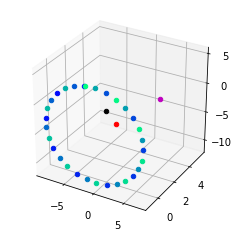

In [57]:
# Datos:
A = [1, 4, -3]
B = [-2, 2, 1]
C = [3, -1, 4]

#CALCULAR EL PUNTO Q
#Escalar el punto A en su X,Y,Z por un factor de 1.372
def scaleMatrix(vector):
  return np.diag([*vector, 1])

scaM = scaleMatrix([1.372, 1.372, 1.372])
Q0 = np.matmul(scaM, [*A, 1])
print('from {} to {}'.format([*A, 1], Q0))

#Transladar punto Q con las cordenadas de B.
def translationMatrix(vector):
  matrix = np.identity(len(vector) + 1)
  matrix[-1,:-1] = vector
  return matrix.T

Q = np.matmul(translationMatrix([-2, 2, 1]), Q0)
print('from {} to {}'.format(Q0, Q))

#ROTAR PUNTO C 37.2 GRADOR CON RESPECTO AL EJE Y. TOMAR COMO PUNTO PIVOTE AL PUNTO Q.
def rotationMatrix(angle_degrees, axis='y', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix

pivot = np.delete(Q,3)
traM = translationMatrix(pivot)
rotM = rotationMatrix(37.2, 'y')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*Q0[:-1], c='m')
ax.scatter(*C[:-1], c='r')

Qaux = [*C, 1]
for color in plt.cm.winter(np.linspace(0, 1, 30)):
  # Translate from a point to the origin
  Qaux = np.matmul(np.linalg.inv(traM), Qaux)

  # # Rotate
  Qaux = np.matmul(rotM, Qaux)

  # # Translate from the origin to the point. Translación inversa. 
  Qaux = np.matmul(traM, Qaux)

  ax.scatter(*Qaux[:-1], color=color) 

plt.show()




# Pregunta2
Considera una pirámide triangular regular. Su lado a = 𝜋 y su altura h = (23‾‾√)𝑎 La base de la pirámide está centrada en el punto D = (-2.345, -7.317, 1.328).

Encuentra todos los vértices de la pirámide. Encuentra la nueva posición de cada vértice cuando la pirámide es rotada con respecto al eje Z por -23°. Usa como pivote el centroide de la pirámide (el centroide es el promedio de cada componente de cada vértice).

In [67]:
# Datos:
a = np.pi #Lado
h = np.sqrt(2/3) #Altura
D = [-2.345, -7.317, 1.328] #Base centrada en este punto

#VERTICES DE PIRAMIDE
v0 = [0, 0, 0]
v1 = [a, 0, 0]
v2 = [0, 0, h]

#CALCULAR NUEVAS POSICINES AL ROTAR VERTICES -23 GRADOS RESPECTO AL EJE Z. USAR CENTROIDE COMO PIVOTE. 
def rotationMatrix(angle_degrees, axis='z', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix

# Nuevas Posiciones
vertices = [v0,v1,v2]
centroide = [
             (v0[0]+v1[0]+v2[0])/3,
             (v0[1]+v1[1]+v2[1])/3,
             (v0[2]+v1[2]+v2[2])/3
            ]
for i in range(3):
  Q0 = vertices[i]
  pivot = centroide
  traM = translationMatrix(pivot)
  rotM = rotationMatrix(-23, 'z')
  Qaux = [*Q0,1]
  # Translate from a point to the origin
  Qaux = np.matmul(np.linalg.inv(traM), Qaux)
  # Rotate
  Qaux = np.matmul(rotM, Qaux)
  # Translate from the origin to the point. Translación inversa. 
  Qaux = np.matmul(traM, Qaux)
  #Deshomonizamos Qaux
  Qaux = np.delete(Qaux,3)
  #Imprimimos resultado
  print('from {} to {}'.format(Q0, Qaux))







from [0, 0, 0] to [0.08324712 0.40917268 0.        ]
from [3.141592653589793, 0, 0] to [ 2.97509841 -0.81834536  0.        ]
from [0, 0, 0.816496580927726] to [0.08324712 0.40917268 0.81649658]
